In [1]:
# Importing important libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
insurance=pd.read_csv('/content/drive/MyDrive/assignments-BE/Linear Regression/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Getting an idea about the data
insurance.info()# Some Columns are of distinct datatypes
insurance.isnull().sum()# No null values
insurance.describe()
insurance.duplicated().sum().any()# there are duplicate values
insurance.duplicated().sum()# one row is duplicated
insurance[insurance.duplicated()]# 581st entire row is duplicated
insurance.drop_duplicates(inplace=True)
insurance.duplicated().sum().any()# no duplicate values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


np.False_

In [15]:
# Data is somewhat balanced

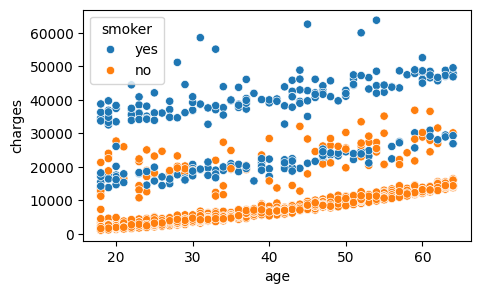

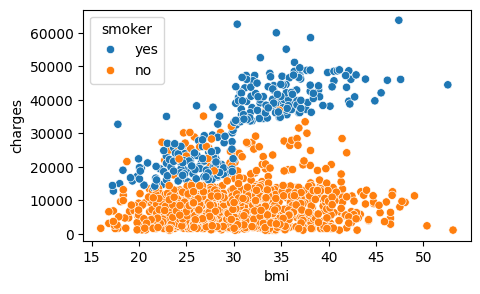

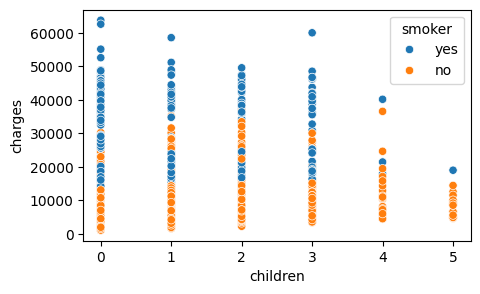

In [4]:
# EDA
for i in ['age','bmi','children']:
  plt.figure(figsize=(5,3))
  sns.scatterplot(x=i,y='charges',data=insurance,hue='smoker')
  plt.show()


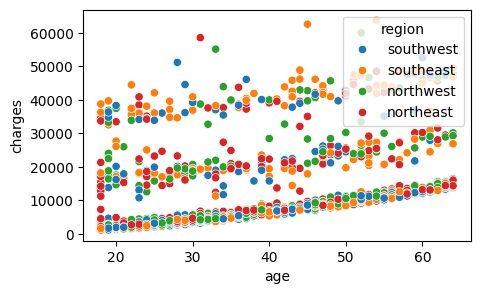

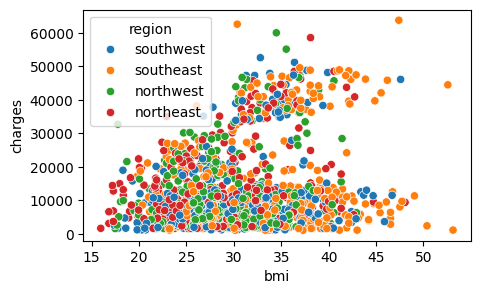

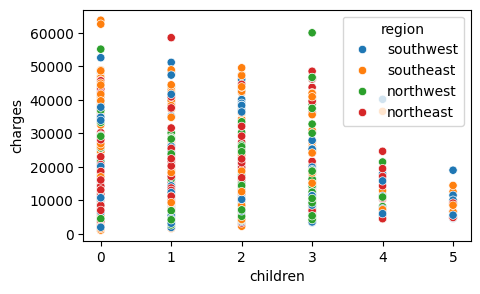

In [5]:
# EDA
for i in insurance.select_dtypes(exclude=object).drop(columns='charges').columns:
  plt.figure(figsize=(5,3))
  sns.scatterplot(x=i,y='charges',data=insurance,hue='region')
  plt.show()

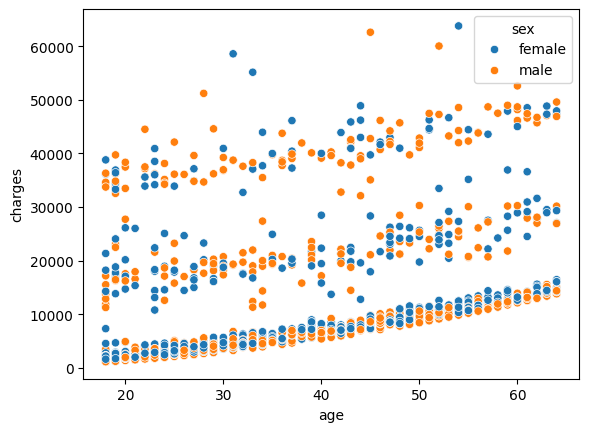

In [6]:
sns.scatterplot(x='age',y='charges',data=insurance,hue='sex')
plt.show()

In [ ]:
# there is no much affect of sex in insurance charges,so we may exclude sex columns while training the model.
# Region can also be removed as there is no significant change as observed

In [7]:
# one hot encoding
insurance=pd.get_dummies(insurance,columns=['smoker'],drop_first=True,dtype=int)
insurance.head()

,age,sex,bmi,children,region,charges,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0


In [8]:
insurance_numerical_datatypes=insurance.select_dtypes(exclude=object)
insurance_numerical_datatypes.head()


,age,bmi,children,charges,smoker_yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


<Axes: >

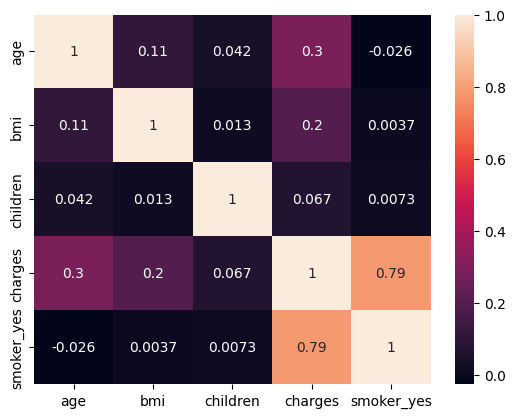

In [9]:
# heatmap
sns.heatmap(insurance_numerical_datatypes.corr(),annot=True)


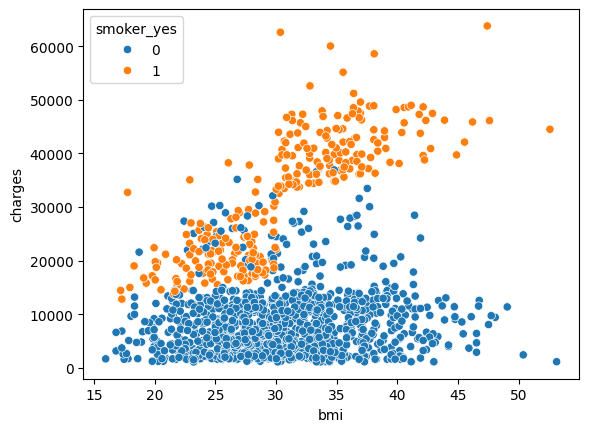

In [12]:
sns.scatterplot(x='bmi',y='charges',data=insurance_numerical_datatypes,hue='smoker_yes')
plt.show()

In [ ]:
# if a person is smoker then the bmi and insurance charges are approximately linearly related


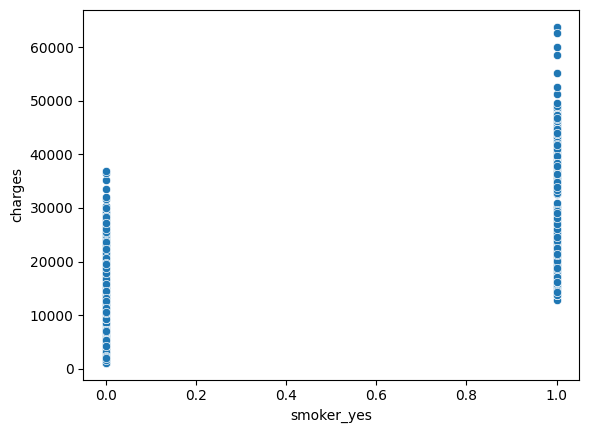

In [13]:
sns.scatterplot(x='smoker_yes',y='charges',data=insurance_numerical_datatypes,)
plt.show()

In [40]:
# separating input andoutput
X=insurance_numerical_datatypes[['smoker_yes','bmi']]
y=insurance_numerical_datatypes['charges']

In [41]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [42]:
# Loading the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [43]:
# predicting the model
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [48]:
# Model Evaluation
from sklearn import metrics
print('MSE for training:',np.round(metrics.mean_squared_error(y_train,y_pred_train)))
print('MSE for testing:',metrics.mean_squared_error(y_test,y_pred_test))
print('R2 score for training:',metrics.r2_score(y_train,y_pred_train))
print('R2 score for testing:',metrics.r2_score(y_test,y_pred_test))

MSE for training: 48665068.0
MSE for testing: 56041254.63306823
R2 score for training: 0.6672275827604421
R2 score for testing: 0.6206542630177445


LinearRegression()

MSE for training: 48665067.59267767
MSE for testing: 56041254.63306823
R2 score for training: 0.6672275827604421
R2 score for testing: 0.6206542630177445
